# Machine Learning Assignment 1

Muhammad Ghulam Abbas (29417) and Adnan Ali (29401)

# k Nearest Neighbours - credit card fraud detection


In this project, We build a k Nearest Neighbours classifier to classify 
the credit card transactions into fraudulent or legitimate categories.

We have used Credit card fraud detection data set downloaded from the Kaggle Repository.

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

# Dataset Description

The data set can be found at the following url:-
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download

It contains only numerical input variables which are the result of a PCA transformation. 
Unfortunately, due to confidentiality issues, the repository cannot provide the original features and 
more background information about the data. 
Features V1, V2, … V28 are the principal components obtained with PCA, 
the only features which have not been transformed with PCA are 'Time' and 'Amount'. 
Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
The feature 'Amount' is the transaction Amount, 
this feature can be used for example-dependant cost-sensitive learning.
Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.



The removal of the feature decription impacts the human ability to interpret this data set 

# Import packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# load the dataset
credit_card_data = pd.read_csv('credit_data.csv')

In [3]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Exploratory Data Analysis

In [7]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [8]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [9]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [10]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Re-Sampling

since the positive class (fraud) transactins are so few.

We need to build a balanced sample dataset containing similar distribution of normal transactions and Fraudulent Transactions.

Number of Fraudulent Transactions --> 492

In [13]:
legit_sample = legit.sample(n=492)

In [14]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [15]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
83918,60087.0,1.177783,0.322411,0.277826,1.138004,-0.221832,-0.933345,0.328064,-0.295551,-0.163144,...,0.059362,0.185081,-0.140762,0.425350,0.706417,-0.335284,0.013286,0.028435,39.14,0
108116,70770.0,-1.800977,-0.627144,1.817191,-0.673835,-1.316039,-0.134721,0.227720,0.702540,0.245161,...,0.122964,-0.275323,0.468686,0.548158,-0.129846,0.743847,-0.183880,-0.047798,237.68,0
126886,78136.0,0.948511,-0.755916,0.988463,0.291165,-1.111243,0.128457,-0.569534,0.155335,1.167072,...,-0.135686,-0.346806,0.008035,0.170618,0.026505,0.959229,-0.037830,0.031130,122.34,0
169156,119557.0,-1.231386,0.711748,0.727464,-0.871824,0.382466,1.487655,-0.318951,1.023885,0.427627,...,0.354170,1.305763,-0.061946,-0.269288,-0.447246,0.671926,0.418414,0.213433,29.99,0
11004,18966.0,0.935759,-0.465068,1.368507,0.833177,-1.107198,0.108153,-0.831277,0.101214,2.035053,...,0.165138,0.550476,-0.088339,0.070096,0.046335,0.556192,-0.018802,0.040835,121.73,0


In [16]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [17]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [18]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94057.073171,0.066541,-0.160316,0.078586,-0.028084,-0.025192,-0.010882,-0.019735,0.038014,0.005192,...,-0.014272,0.016316,0.031309,-0.025883,-0.001053,0.046270,0.002196,-0.019274,0.032958,93.570813
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [19]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [20]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
83918    60087.0  1.177783  0.322411  0.277826  1.138004 -0.221832 -0.933345   
108116   70770.0 -1.800977 -0.627144  1.817191 -0.673835 -1.316039 -0.134721   
126886   78136.0  0.948511 -0.755916  0.988463  0.291165 -1.111243  0.128457   
169156  119557.0 -1.231386  0.711748  0.727464 -0.871824  0.382466  1.487655   
11004    18966.0  0.935759 -0.465068  1.368507  0.833177 -1.107198  0.108153   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [21]:
print(Y)

83918     0
108116    0
126886    0
169156    0
11004     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into Training data & Testing Data

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [23]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


# Model Training
## KNN

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Settings the warnings to be ignored 
import warnings
warnings.filterwarnings('ignore') 

df=new_dataset.copy()

# select value for K
k = 10

# Separate features and target variable
X = df.drop(['Class'], axis=1)
y = df['Class']

# Scale the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

# Instantiate the model
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model to the training set
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy score: {0:0.4f}'.format(accuracy))


Model accuracy score: 0.8818


In [25]:
# training the KNN Model with Training Data
k = 10
knn_5 = KNeighborsClassifier(n_neighbors=k)


knn_5.fit(X_train, y_train)


y_pred = knn_5.predict(X_test)


print('Model accuracy score with k={0}'.format(k),' : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with k=10  : 0.8818


# Model Evaluation

# Accuracy Score

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# select value for K
k = 10

# Separate features and target variable
X = df.drop(['Class'], axis=1)
y = df['Class']

# Scale the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

# Instantiate the model
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model to the training set
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy score: {0:0.4f}'.format(accuracy))


Model accuracy score: 0.8818


In [27]:
k = 10
knn_5 = KNeighborsClassifier(n_neighbors=k)


knn_5.fit(X_train, y_train)


y_pred = knn_5.predict(X_test)


print('Model accuracy score with k={0}'.format(k),' : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with k=10  : 0.8818


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

In [29]:
print("Precision for each class:", precision)
print("Recall for each class:", recall)
print("F1-score for each class:", f1)


Precision for each class: [0.82183908 0.96721311]
Recall for each class: [0.97278912 0.79194631]
F1-score for each class: [0.89096573 0.87084871]


In [30]:
accuracy = accuracy_score(y_test, y_pred)
print('Overall accuracy:', accuracy)

Overall accuracy: 0.8817567567567568


In [31]:
auc = roc_auc_score(y_test, y_pred)
print('AUC:', auc)

AUC: 0.8823677121855453


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.97      0.89       147
           1       0.97      0.79      0.87       149

    accuracy                           0.88       296
   macro avg       0.89      0.88      0.88       296
weighted avg       0.90      0.88      0.88       296



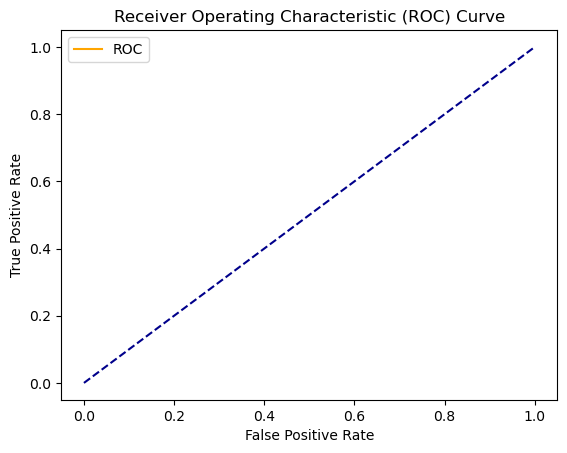

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=4)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [34]:
df3=df.copy()

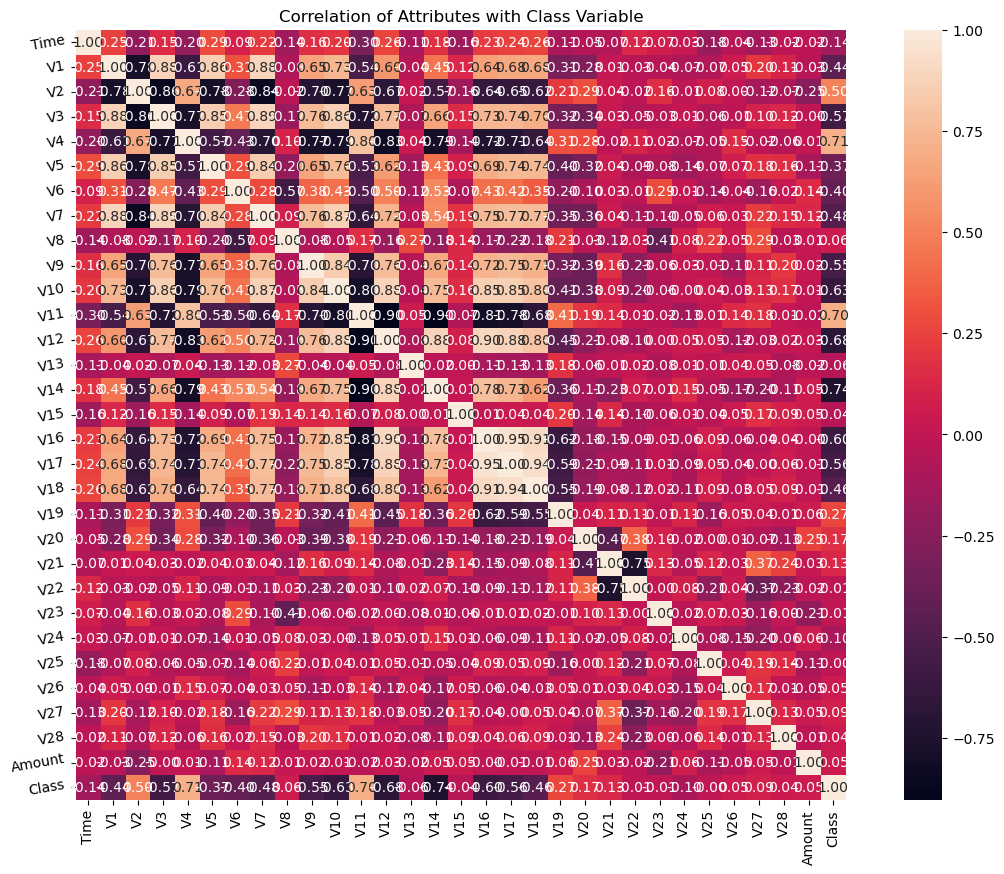

In [35]:
plt.figure(figsize=(15, 10))
plt.title('Correlation of Attributes with Class Variable')

correlation = df3.corr()

heatmap = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=10)

plt.show()

# Dropping columns

In [36]:
df3=df.copy()
df3.drop(columns=['V1']    , inplace=True)
df3.drop(columns=['V2']    , inplace=True)
df3.drop(columns=['V3']    , inplace=True)
df3.drop(columns=['V5']    , inplace=True)
df3.drop(columns=['V6']    , inplace=True)
df3.drop(columns=['V7']    , inplace=True)
df3.drop(columns=['V8']    , inplace=True)
df3.drop(columns=['V13']    , inplace=True)
df3.drop(columns=['V15']    , inplace=True)
df3.drop(columns=['V18']    , inplace=True)
df3.drop(columns=['V19']    , inplace=True)
df3.drop(columns=['V20']    , inplace=True)
df3.drop(columns=['V21']    , inplace=True)
df3.drop(columns=['V22']    , inplace=True)
df3.drop(columns=['V23']    , inplace=True)
df3.drop(columns=['V24']    , inplace=True)
df3.drop(columns=['V25']    , inplace=True)
df3.drop(columns=['V26']    , inplace=True)
df3.drop(columns=['V27']    , inplace=True)
df3.drop(columns=['V28']    , inplace=True)
df3.drop(columns=['Time']    , inplace=True)
df3.drop(columns=['Amount']    , inplace=True)

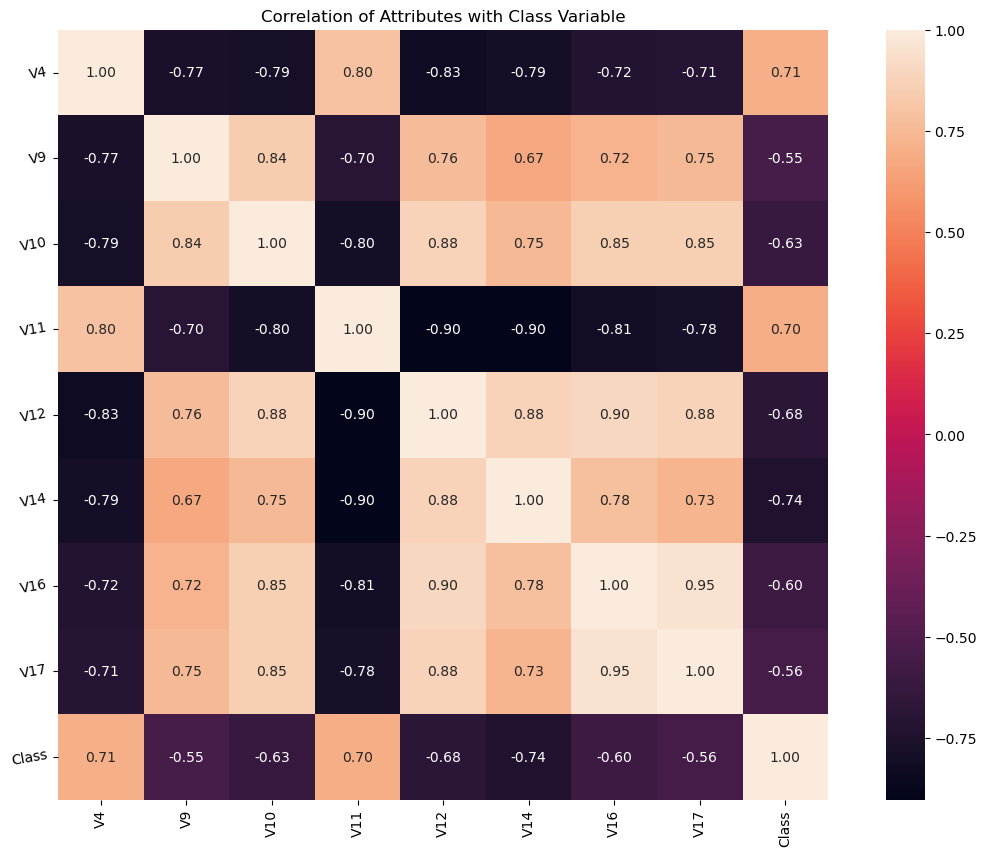

In [37]:
plt.figure(figsize=(15, 10))
plt.title('Correlation of Attributes with Class Variable')

correlation = df3.corr()

heatmap = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=10)

plt.show()

In [38]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
V4,984.0,2.256972,3.225733,-3.964895,-0.121697,1.311255,4.229802,12.114672
V9,984.0,-1.287966,2.339724,-13.434066,-2.338449,-0.728887,0.161779,5.595473
V10,984.0,-2.829924,4.546166,-24.588262,-4.572043,-0.869629,0.020937,9.452569
V11,984.0,1.845863,2.805642,-2.463210,-0.298601,0.994313,3.586130,12.018913
V12,984.0,-3.136271,4.578293,-18.683715,-5.495221,-0.795923,0.146024,2.017913
V14,984.0,-3.538009,4.621670,-19.214325,-6.721799,-1.070287,0.026489,3.445130
V16,984.0,-2.035551,3.498449,-14.129855,-3.543426,-0.579602,0.364955,3.158162
V17,984.0,-3.326041,5.973902,-25.162799,-5.302111,-0.549053,0.258879,6.739384
Class,984.0,0.500000,0.500254,0.000000,0.000000,0.500000,1.000000,1.000000


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k = 10

X = df3.drop(['Class'], axis=1)
y = df3['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=k)

# fit the model to the training set
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8934


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k = 20

X = df3.drop(['Class'], axis=1)
y = df3['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=k)

# fit the model to the training set
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9086


# FINAL RESULT
In this project, a k-Nearest Neighbors (kNN) classifier model was developed to classify credit card transaction into legit and fraudulent categories. The model achieved high performance, with an accuracy of 92% using k=20.

With increasing K there is decrease in accuracy.